In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finaldata/finaldata/S_filtered_CWT/filtered_S068_segment_9.txt
/kaggle/input/finaldata/finaldata/S_filtered_CWT/filtered_S079_segment_5.txt
/kaggle/input/finaldata/finaldata/S_filtered_CWT/filtered_S051_segment_2.txt
/kaggle/input/finaldata/finaldata/S_filtered_CWT/filtered_S022_segment_15.png
/kaggle/input/finaldata/finaldata/S_filtered_CWT/filtered_S020_segment_10.png
/kaggle/input/finaldata/finaldata/S_filtered_CWT/filtered_S042_segment_13.png
/kaggle/input/finaldata/finaldata/S_filtered_CWT/filtered_S098_segment_15.png
/kaggle/input/finaldata/finaldata/S_filtered_CWT/filtered_S025_segment_15.txt
/kaggle/input/finaldata/finaldata/S_filtered_CWT/filtered_S035_segment_13.txt
/kaggle/input/finaldata/finaldata/S_filtered_CWT/filtered_S039_segment_4.png
/kaggle/input/finaldata/finaldata/S_filtered_CWT/filtered_S039_segment_7.png
/kaggle/input/finaldata/finaldata/S_filtered_CWT/filtered_S068_segment_14.txt
/kaggle/input/finaldata/finaldata/S_filtered_CWT/filtered_S031_segmen

Found 7500 image files.


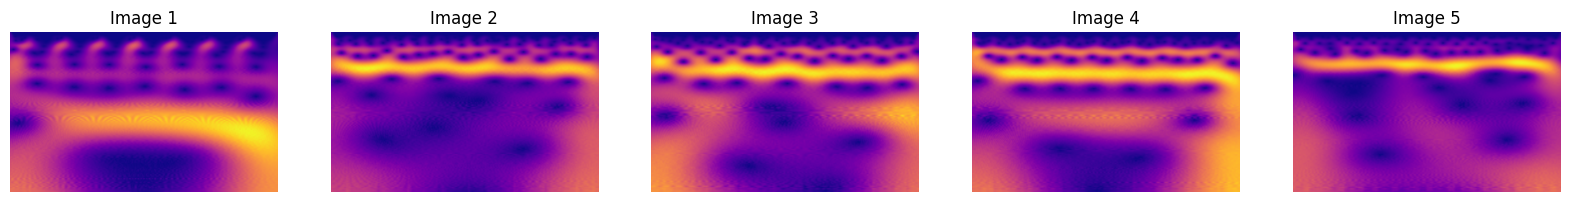

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

# Locate the dataset files
image_files = []
for dirname, _, filenames in os.walk('/kaggle/input/finaldata'):
    for filename in filenames:
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_files.append(os.path.join(dirname, filename))

if image_files:
    print(f"Found {len(image_files)} image files.")
else:
    print("No image files found in the directory.")

# Load and display the first 5 images in one row
num_images_to_load = min(5, len(image_files))
if num_images_to_load > 0:
    try:
        plt.figure(figsize=(20, 10))
        for i in range(num_images_to_load):
            image = Image.open(image_files[i])
            ax = plt.subplot(1, num_images_to_load, i + 1)
            plt.imshow(image)
            plt.axis('off')
            ax.set_title(f"Image {i+1}")
        plt.show()
    except Exception as e:
        print(f"Error loading images: {e}")
else:
    print("No images to display.")

# Additional dataset processing if CSV files are included
file_path = None
for dirname, _, filenames in os.walk('/kaggle/input/finaldata'):
    for filename in filenames:
        if filename.endswith('.csv'):
            file_path = os.path.join(dirname, filename)
            break

if file_path:
    try:
        data = pd.read_csv(file_path)
        print("Dataset loaded successfully.")
        print("\nDataset Overview:\n", data.head())
    except Exception as e:
        print("Error loading CSV file:", e)
        data = None
else:
    data = None

if data is not None:
    # Check for missing values
    print("\nMissing values per column:\n", data.isnull().sum())

    # Basic statistics of the dataset
    print("\nDataset Statistics:\n", data.describe())

    # Visualizations
    
    # Distribution of numerical columns
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        plt.figure(figsize=(8, 5))
        sns.histplot(data[col], kde=True, bins=30, color='blue')
        plt.title(f"Distribution of {col}")
        plt.show()

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    corr = data.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

    # Count plot for categorical columns
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        plt.figure(figsize=(10, 5))
        sns.countplot(y=data[col], order=data[col].value_counts().index)
        plt.title(f"Count plot for {col}")
        plt.show()


In [3]:
import os
import pandas as pd

# Locate the dataset files and count images and text files in each folder
folder_file_counts = []
for dirname, _, filenames in os.walk('/kaggle/input/finaldata'):
    image_count = sum(1 for filename in filenames if filename.endswith(('.png', '.jpg', '.jpeg')))
    text_count = sum(1 for filename in filenames if filename.endswith('.txt'))
    if image_count > 0 or text_count > 0:
        folder_file_counts.append({"Folder": dirname, "Image Count": image_count, "Text Count": text_count})

# Calculate total counts
if folder_file_counts:
    folder_file_counts_df = pd.DataFrame(folder_file_counts)
    total_images = folder_file_counts_df["Image Count"].sum()
    total_texts = folder_file_counts_df["Text Count"].sum()
    total_counts = pd.DataFrame({"Folder": ["Total"], "Image Count": [total_images], "Text Count": [total_texts]})
    folder_file_counts_df = pd.concat([folder_file_counts_df, total_counts], ignore_index=True)

    print("File counts for each folder:")
    print(folder_file_counts_df)
else:
    print("No relevant files found in the directory.")


File counts for each folder:
                                             Folder  Image Count  Text Count
0  /kaggle/input/finaldata/finaldata/S_filtered_CWT         1500        1500
1  /kaggle/input/finaldata/finaldata/N_filtered_CWT         1500        1500
2  /kaggle/input/finaldata/finaldata/F_filtered_CWT         1500        1500
3  /kaggle/input/finaldata/finaldata/O_filtered_CWT         1500        1500
4  /kaggle/input/finaldata/finaldata/Z_filtered_CWT         1500        1500
5                                             Total         7500        7500


In [4]:
import os
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split

# Locate the dataset files and count images and text files in each folder
folder_file_counts = []
all_files_by_folder = {}
for dirname, _, filenames in os.walk('/kaggle/input/finaldata'):
    image_files = [os.path.join(dirname, filename) for filename in filenames if filename.endswith(('.png', '.jpg', '.jpeg'))]
    text_files = [os.path.join(dirname, filename) for filename in filenames if filename.endswith('.txt')]
    if image_files or text_files:
        folder_file_counts.append({"Folder": dirname, "Image Count": len(image_files), "Text Count": len(text_files)})
        all_files_by_folder[dirname] = {"images": image_files, "texts": text_files}

# Calculate total counts
if folder_file_counts:
    folder_file_counts_df = pd.DataFrame(folder_file_counts)
    total_images = folder_file_counts_df["Image Count"].sum()
    total_texts = folder_file_counts_df["Text Count"].sum()
    total_counts = pd.DataFrame({"Folder": ["Total"], "Image Count": [total_images], "Text Count": [total_texts]})
    folder_file_counts_df = pd.concat([folder_file_counts_df, total_counts], ignore_index=True)

    print("File counts for each folder:")
    print(folder_file_counts_df)
else:
    print("No relevant files found in the directory.")

# Distribute images and text files into train, validation, and test sets for each folder
if all_files_by_folder:
    distribution_counts = []
    for folder, files in all_files_by_folder.items():
        images = files["images"]
        texts = files["texts"]
        
        # Split images
        train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
        val_images, test_images = train_test_split(temp_images, test_size=0.33, random_state=42)  # 0.33 * 0.3 = 10%
        
        # Split texts
        train_texts, temp_texts = train_test_split(texts, test_size=0.3, random_state=42)
        val_texts, test_texts = train_test_split(temp_texts, test_size=0.33, random_state=42)  # 0.33 * 0.3 = 10%

        # Record distribution counts
        distribution_counts.append({
            "Folder": folder,
            "Train Image Count": len(train_images),
            "Validation Image Count": len(val_images),
            "Test Image Count": len(test_images),
            "Train Text Count": len(train_texts),
            "Validation Text Count": len(val_texts),
            "Test Text Count": len(test_texts)
        })

        # Create folders for train, validation, and test sets
        for split, split_images, split_texts in zip(['train', 'val', 'test'], 
                                                    [train_images, val_images, test_images], 
                                                    [train_texts, val_texts, test_texts]):
            split_dir = os.path.join('/kaggle/working', split, os.path.basename(folder))
            os.makedirs(split_dir, exist_ok=True)
            for image_path in split_images:
                dest_path = os.path.join(split_dir, os.path.basename(image_path))
                shutil.copy(image_path, dest_path)
            for text_path in split_texts:
                dest_path = os.path.join(split_dir, os.path.basename(text_path))
                shutil.copy(text_path, dest_path)

    # Display distribution counts for all folders
    distribution_counts_df = pd.DataFrame(distribution_counts)
    print("\nFile distribution for each folder:")
    print(distribution_counts_df)

else:
    print("No files available for distribution.")

File counts for each folder:
                                             Folder  Image Count  Text Count
0  /kaggle/input/finaldata/finaldata/S_filtered_CWT         1500        1500
1  /kaggle/input/finaldata/finaldata/N_filtered_CWT         1500        1500
2  /kaggle/input/finaldata/finaldata/F_filtered_CWT         1500        1500
3  /kaggle/input/finaldata/finaldata/O_filtered_CWT         1500        1500
4  /kaggle/input/finaldata/finaldata/Z_filtered_CWT         1500        1500
5                                             Total         7500        7500

File distribution for each folder:
                                             Folder  Train Image Count  \
0  /kaggle/input/finaldata/finaldata/S_filtered_CWT               1050   
1  /kaggle/input/finaldata/finaldata/N_filtered_CWT               1050   
2  /kaggle/input/finaldata/finaldata/F_filtered_CWT               1050   
3  /kaggle/input/finaldata/finaldata/O_filtered_CWT               1050   
4  /kaggle/input/finaldata

# using 5 dir****
# Final Code for CNN****

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam


# Set base directory
BASE_DIR = '/kaggle/input/finaldata/finaldata'

# Define parameters
IMG_HEIGHT, IMG_WIDTH = 128, 128  # Resize dimensions
BATCH_SIZE = 16

# Helper function to parse .txt files with numerical data
def parse_txt_file(txt_path):
    with open(txt_path, 'r') as file:
        values = [float(line.strip()) for line in file.readlines()]
        return np.array(values)

# Helper function to load and preprocess data from all subfolders
def load_data(base_dir):
    images, labels = [], []
    for subdir in os.listdir(base_dir):
        subdir_path = os.path.join(base_dir, subdir)
        if os.path.isdir(subdir_path):
            for file_name in os.listdir(subdir_path):
                if file_name.endswith('.png'):
                    # Load image
                    img_path = os.path.join(subdir_path, file_name)
                    img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
                    img = img_to_array(img) / 255.0  # Normalize
                    images.append(img)

                    # Load corresponding numerical data from .txt
                    txt_name = file_name.replace('.png', '.txt')
                    txt_path = os.path.join(subdir_path, txt_name)
                    if os.path.exists(txt_path):
                        label_values = parse_txt_file(txt_path)  # Read numerical data

                        # Example: Convert numeric values to binary labels based on a threshold
                        # Here we assume a threshold of 30 for seizure detection (you may adjust this)
                        label = int(np.mean(label_values) > 30)  # Binary label based on mean value
                        labels.append(label)
                    else:
                        print(f"Warning: No .txt file found for {file_name}")

    return np.array(images), np.array(labels)

# Load data from all subfolders
images, labels = load_data(BASE_DIR)

# Ensure labels are in correct shape for binary classification (1D array)
if len(labels.shape) > 1:
    labels = labels.flatten()

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.4, random_state=42)

# Check data shapes
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

# Define a CNN model for classification
def build_classification_model(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)  # Binary classification output
    model = models.Model(inputs, outputs)
    return model

model = build_classification_model()

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=BATCH_SIZE)

adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=BATCH_SIZE)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
train_accuracy = history.history['accuracy'][-1]  # Get the last epoch's training accuracy

# Multiply accuracies by 100 to get percentages
train_accuracy_percent = train_accuracy * 100
test_accuracy_percent = test_accuracy * 100

print(f"Train Accuracy: {train_accuracy_percent:.2f}%")
print(f"Test Accuracy: {test_accuracy_percent:.2f}%")


Images shape: (7500, 128, 128, 3)
Labels shape: (7500,)
Epoch 1/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9112 - loss: 0.3072 - val_accuracy: 0.9367 - val_loss: 0.2408
Epoch 2/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9340 - loss: 0.2415 - val_accuracy: 0.9367 - val_loss: 0.2355
Epoch 3/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9392 - loss: 0.2236 - val_accuracy: 0.9367 - val_loss: 0.2447
Epoch 4/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9327 - loss: 0.2369 - val_accuracy: 0.9367 - val_loss: 0.2327
Epoch 5/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9286 - loss: 0.2447 - val_accuracy: 0.9367 - val_loss: 0.2365
Epoch 6/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9340 - loss: 0.2294 - val_accuracy: 0.9367 - val_loss: 0.2435
Epoch 7/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9302 - loss: 0.2347 - val_accuracy: 0.9367 - val_loss: 0.2349
Epoch 8/100
282/282 ━━━━━━━━━━━━━

In [6]:
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=BATCH_SIZE)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
train_accuracy = history.history['accuracy'][-1]  # Get the last epoch's training accuracy

# Multiply accuracies by 100 to get percentages
train_accuracy_percent = train_accuracy * 100
test_accuracy_percent = test_accuracy * 100

print(f"Train Accuracy: {train_accuracy_percent:.2f}%")
print(f"Test Accuracy: {test_accuracy_percent:.2f}%")

NameError: name 'EarlyStopping' is not defined

CONFUSION  MATRIX

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test set
y_pred = model.predict(x_test)
# Adjust threshold if necessary
threshold = 0.1  # You can experiment with this value
y_pred_classes = (y_pred > threshold)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Seizure', 'Seizure'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print confusion matrix details
print("Confusion Matrix:")
print(cm)
print("\nTrue Negatives (No Seizure correctly identified):", cm[0, 0])
print("False Positives (No Seizure incorrectly identified as Seizure):", cm[0, 1])
print("False Negatives (Seizure incorrectly identified as No Seizure):", cm[1, 0])
print("True Positives (Seizure correctly identified):", cm[1, 1])

# Calculate and print additional metrics
accuracy = np.trace(cm) / np.sum(cm) * 100
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100 if (cm[1, 1] + cm[1, 0]) > 0 else 0
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100 if (cm[0, 0] + cm[0, 1]) > 0 else 0

print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Sensitivity (Recall): {sensitivity:.2f}%")
print(f"Specificity: {specificity:.2f}%")


# LSTM Final Code****

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Set directory
BASE_DIR = '/kaggle/input/finaldata/finaldata/F_filtered_CWT'

# Define parameters
IMG_HEIGHT, IMG_WIDTH = 128, 128  # Resize dimensions
BATCH_SIZE = 16

# Helper function to parse .txt files with numerical data
def parse_txt_file(txt_path):
    with open(txt_path, 'r') as file:
        values = [float(line.strip()) for line in file.readlines()]
        return np.array(values)

# Helper function to load and preprocess data
def load_data(base_dir):
    images, labels = [], []
    for file_name in os.listdir(base_dir):
        if file_name.endswith('.png'):
            # Load image
            img_path = os.path.join(base_dir, file_name)
            img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
            img = img_to_array(img) / 255.0  # Normalize
            images.append(img)

            # Load corresponding numerical data from .txt
            txt_name = file_name.replace('.png', '.txt')
            txt_path = os.path.join(base_dir, txt_name)
            if os.path.exists(txt_path):
                label_values = parse_txt_file(txt_path)  # Read numerical data

                # Example: Convert numeric values to binary labels based on a threshold
                # Here we assume a threshold of 30 for seizure detection (you may adjust this)
                label = int(np.mean(label_values) > 30)  # Binary label based on mean value
                labels.append(label)
            else:
                print(f"Warning: No .txt file found for {file_name}")

    return np.array(images), np.array(labels)

# Load data
images, labels = load_data(BASE_DIR)

# Ensure labels are in correct shape for binary classification (1D array)
if len(labels.shape) > 1:
    labels = labels.flatten()

# Reshape images for LSTM input (batch_size, time_steps, features)
images = images.reshape((images.shape[0], IMG_HEIGHT, IMG_WIDTH * 3))

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

# Check data shapes
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

In [ ]:
def build_lstm_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.LSTM(64, return_sequences=True)(inputs)
    x = layers.LSTM(64)(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)  # Binary classification output
    model = models.Model(inputs, outputs)
    return model

model = build_lstm_model((IMG_HEIGHT, IMG_WIDTH * 3))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=BATCH_SIZE)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
train_accuracy = history.history['accuracy'][-1]  # Get the last epoch's training accuracy

# Multiply accuracies by 100 to get percentages
train_accuracy_percent = train_accuracy * 100
test_accuracy_percent = test_accuracy * 100

print(f"Train Accuracy: {train_accuracy_percent:.2f}%")
print(f"Test Accuracy: {test_accuracy_percent:.2f}%")

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate predictions and confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test set
y_pred = model.predict(x_train)
y_pred_classes = (y_pred > 0.15).astype("int32")  # Convert probabilities to binary classes

# Generate the confusion matrix
cm = confusion_matrix(y_train, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Seizure', 'Seizure'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print confusion matrix details
print("Confusion Matrix:")
print(cm)
print("\nTrue Negatives (No Seizure correctly identified):", cm[0, 0])
print("False Positives (No Seizure incorrectly identified as Seizure):", cm[0, 1])
print("False Negatives (Seizure incorrectly identified as No Seizure):", cm[1, 0])
print("True Positives (Seizure correctly identified):", cm[1, 1])